In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
# import pycountry # match country names to iso code
# import geoplot as gplt #plotting maps
# import geopandas as gpd
# import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import os.path
from helpers import * #custom made functions
print("import completed")

# number of pandas rows to display
pd.set_option('display.max_rows', 10)

import completed


In [2]:
#data folder path
data_folder = './Data/'
path_ba = data_folder + 'BeerAdvocate/'
path_rb = data_folder + 'RateBeer/'
path_md = data_folder + 'matched_beer_data/'

In [3]:
pickle_filename = "df_rb_reviews_filtered_beers_merged_users.pickle"
df_rb_reviews_filtered_beers_merged_users = pd.read_pickle(f"Data/{pickle_filename}")
pickle_filename = "df_ba_ratings_filtered_beers_merged_users.pickle"
df_ba_reviews_filtered_beers_merged_users = pd.read_pickle(f"Data/{pickle_filename}")

In [4]:
df_ba_reviews_filtered_beers_merged_users['country'].value_counts()

United States                     504591
Canada                             27198
England                             4429
Australia                           4100
Sweden                              2837
                                   ...  
Macedonia                              1
Tanzania                               1
Aruba                                  1
Paraguay                               1
British Indian Ocean Territory         1
Name: country, Length: 99, dtype: int64

In [5]:
eng = df_ba_reviews_filtered_beers_merged_users[df_ba_reviews_filtered_beers_merged_users['country']=='England']
eng = eng[eng['text']!=""]
eng_text = eng['text'][0:5]

us = df_ba_reviews_filtered_beers_merged_users[df_ba_reviews_filtered_beers_merged_users['country']=='United States']
us = us[us['text']!=""]
us_text = us['text'][0:5]

C:\Users\oisin\AppData\Local\Temp\ipykernel_3328\3628209503.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  eng_text = eng['text'][0:5]
C:\Users\oisin\AppData\Local\Temp\ipykernel_3328\3628209503.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  us_text = us['text'][0:5]


In [6]:
from corpus import Corpus
corpus = Corpus(language='en')

In [7]:
vals = df_ba_reviews_filtered_beers_merged_users['country'].value_counts()
ind = df_ba_reviews_filtered_beers_merged_users['country'].value_counts().index
for i in range(len(vals)):
    print(vals[i],ind[i])

504591 United States
27198 Canada
4429 England
4100 Australia
2837 Sweden
2743 Netherlands
2448 Romania
2049 Belgium
1565 Germany
952 Spain
904 Russia
759 Scotland
751 Italy
632 Panama
622 France
594 Brazil
482 Ireland
389 Japan
387 Switzerland
354 Mexico
339 Northern Ireland
293 Thailand
266 Finland
206 Norway
197 Poland
185 Austria
164 Serbia
154 Jersey
148 Portugal
146 Hong Kong
145 Croatia
124 Ukraine
120 Venezuela
116 Lithuania
112 Slovenia
101 Taiwan
90 Greece
85 China
81 Czech Republic
79 Denmark
69 Philippines
65 Lesotho
59 Turkey
58 Israel
54 South Africa
52 Singapore
43 Puerto Rico
39 Hungary
33 Aotearoa
23 Belarus
21 Iceland
21 Cyprus
19 Costa Rica
19 Wales
18 Argentina
16 Luxembourg
16 Bulgaria
16 United Arab Emirates
15 India
14 Lebanon
12 Colombia
10 Jordan
9 Uruguay
8 Antarctica
7 Tajikistan
7 Dominican Republic
7 Bahamas
7 Faroe Islands
7 Bolivia
6 Vietnam
6 Chile
5 Honduras
5 Malta
5 Slovak Republic
5 Bosnia and Herzegovina
5 Estonia
4 Andorra
4 Burkina Faso
3 Guatemal

In [9]:
country_list = ['United States', 'England', 'Northern Ireland', 'Wales', 'Scotland', 'Australia', 'New Zealand', 'Canada', 'Isle of Man', 'Ireland']

for country in country_list: #list(ind):
    df = df_ba_reviews_filtered_beers_merged_users[df_ba_reviews_filtered_beers_merged_users['country']==country]
    df = df[df['text']!=""]
    df_text = df['text']
    text = ' '.join(df_text)

    corpus.add_texts([text], [country], [country])

In [10]:
corpus.preprocess(alpha_only=True, lowercase=True)

corpus.tokenize()

corpus.vectorize()

c:\Users\oisin\anaconda3\envs\ada\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['a',
 'about',
 'abv',
 'actually',
 'after',
 'aftertaste',
 'again',
 'alcohol',
 'ale',
 'all',
 'almost',
 'along',
 'also',
 'although',
 'am',
 'amber',
 'american',
 'amount',
 'amp',
 'an',
 'and',
 'another',
 'any',
 'appearance',
 'apple',
 'apricot',
 'are',
 'aroma',
 'aromas',
 'around',
 'as',
 'at',
 'average',
 'away',
 'back',
 'backbone',
 'background',
 'bad',
 'balance',
 'balanced',
 'banana',
 'barrel',
 'base',
 'be',
 'beautiful',
 'because',
 'been',
 'beer',
 'beers',
 'before',
 'behind',
 'being',
 'belgian',
 'best',
 'better',
 'between',
 'big',
 'biscuit',
 'bit',
 'bite',
 'bitter',
 'bitterness',
 'black',
 'bodied',
 'body',
 'both',
 'bottle',
 'bourbon',
 'bread',
 'bready',
 'brew',
 'brewery',
 'bright',
 'brown',
 'bubbles',
 'bubbly',
 'burnt',
 'but',
 'by',
 'can',
 'cant',
 'cap',
 'caramel',
 'carbonated',
 'carbonation',
 'certainly',
 'character',
 'cherry',
 'chocolate',
 'citrus',
 'citrusy',
 'clean',
 'clear',
 'cloudy',
 'clove',
 '

In [11]:
from analysis import distance_matrix
from visualization import clustermap

United States ------------------------------
 United States: 0.00 England: 0.17 Northern Ireland: 0.58 Wales: 0.43 Scotland: 0.22 Australia: 0.15 New Zealand: 1.00 Canada: 0.10 Isle of Man: 0.55 Ireland: 0.23
England ------------------------------
 United States: 0.17 England: 0.00 Northern Ireland: 0.56 Wales: 0.39 Scotland: 0.25 Australia: 0.18 New Zealand: 1.00 Canada: 0.15 Isle of Man: 0.59 Ireland: 0.26
Northern Ireland ------------------------------
 United States: 0.58 England: 0.56 Northern Ireland: 0.00 Wales: 0.66 Scotland: 0.58 Australia: 0.57 New Zealand: 1.00 Canada: 0.55 Isle of Man: 0.85 Ireland: 0.61
Wales ------------------------------
 United States: 0.43 England: 0.39 Northern Ireland: 0.66 Wales: 0.00 Scotland: 0.45 Australia: 0.44 New Zealand: 1.00 Canada: 0.43 Isle of Man: 0.71 Ireland: 0.47
Scotland ------------------------------
 United States: 0.22 England: 0.25 Northern Ireland: 0.58 Wales: 0.45 Scotland: 0.00 Australia: 0.24 New Zealand: 1.00 Canada: 0.23 Isl

<Figure size 640x480 with 0 Axes>

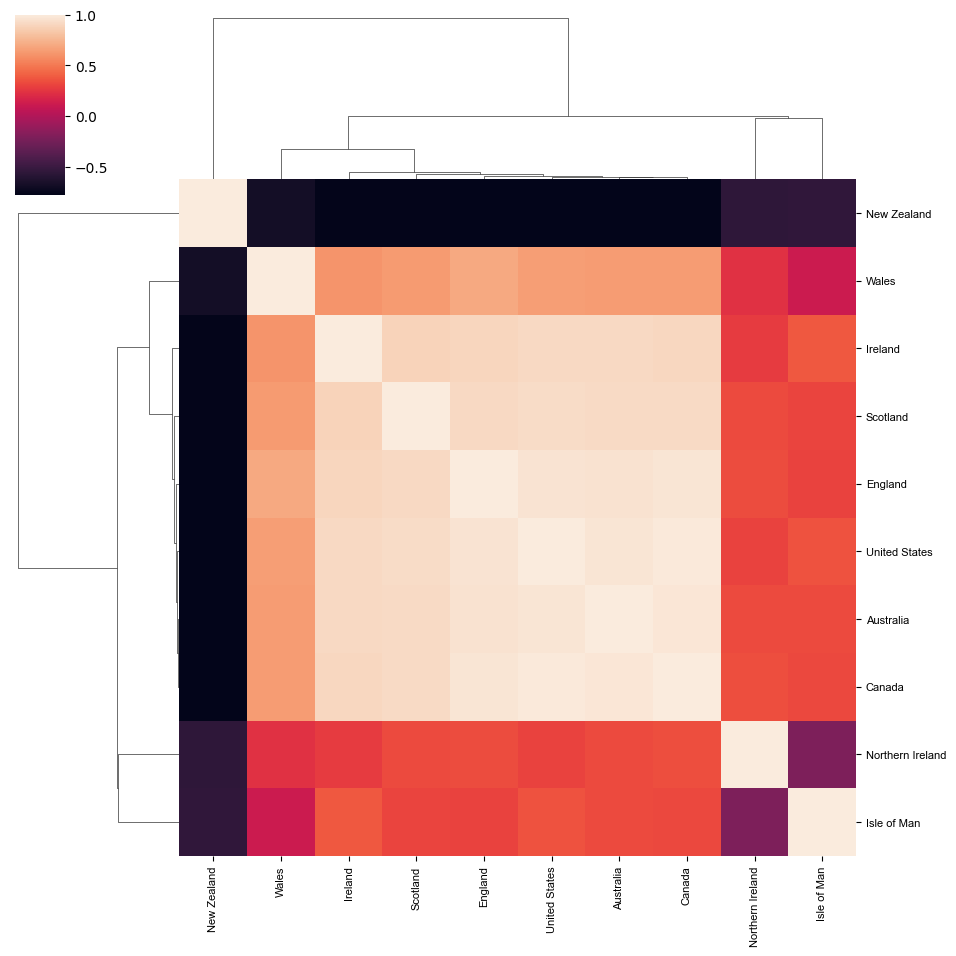

In [28]:
metric = 'euclidean' #'cosine' #'cityblock' #'euclidean' # 'manhattan' #'minmax'
dm = distance_matrix(corpus, metric=metric)
for i in range(len(country_list)):
    country = country_list[i]
    print(country, "-"*30)
    stringy=''
    for j in range(len(country_list)):
        stringy+=" "+country_list[j] + ": " + f'{dm[i][j]:.2f}'
    print(stringy)
clustermap(corpus, distance_matrix=dm, fontsize=8, color_leafs=True,\
           outputfile='TEST.pdf',
          show=True, save=False, return_svg=False)